In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
import numpy as np 
import pandas as pd

In [12]:
df = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")


In [13]:
df_label = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")


In [14]:
# Application Reord
df.shape


(438557, 18)

In [16]:
#Credit Record
df_label.shape


(1048575, 3)

In [17]:
# Application Reord
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [18]:
# Credit Record
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [19]:
df_label.groupby('ID')['STATUS'].count()

ID
5001711     4
5001712    19
5001713    22
5001714    15
5001715    60
           ..
5150482    18
5150483    18
5150484    13
5150485     2
5150487    30
Name: STATUS, Length: 45985, dtype: int64

In [20]:
df_label['STATUS'], labels = pd.factorize(df_label['STATUS'])

In [21]:
labels

Index(['X', '0', 'C', '1', '2', '3', '4', '5'], dtype='object')

In [22]:
df_label

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,0
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [23]:
df_label_clean = df_label[df_label['STATUS'] != 0]
df_label_clean

,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,2
5,5001712,-1,2
...,...,...,...
1048570,5150487,-25,2
1048571,5150487,-26,2
1048572,5150487,-27,2
1048573,5150487,-28,2


In [24]:
df_label_clean['STATUS'][df_label['STATUS'] > 2] = 10
df_label_clean['STATUS'][df_label['STATUS'] <= 2] = 0
df_label_clean

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,ID,MONTHS_BALANCE,STATUS
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,0
5,5001712,-1,0
...,...,...,...
1048570,5150487,-25,0
1048571,5150487,-26,0
1048572,5150487,-27,0
1048573,5150487,-28,0


In [25]:
df_label_clean.groupby('STATUS')['STATUS'].count()

STATUS
0     825151
10     14194
Name: STATUS, dtype: int64

In [26]:
df_label_group = df_label_clean.groupby('ID').mean()

In [27]:
df_label_group

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.000000
5001712,-9.000000,0.000000
5001717,-10.500000,0.000000
5001718,-18.724138,0.689655
5001719,-21.000000,0.000000
...,...,...
5150480,-36.500000,0.000000
5150482,-19.500000,0.000000
5150484,-6.000000,0.000000


In [28]:
df_label_group['STATUS'][df_label_group['STATUS'] > 0] = 1
df_label_group['STATUS'][df_label_group['STATUS'] <= 0] = 0

In [29]:
df_label_group.groupby('STATUS')['STATUS'].count()

STATUS
0.0    36099
1.0     5350
Name: STATUS, dtype: int64

In [30]:
df_label_group

,MONTHS_BALANCE,STATUS
ID,,
5001711,-2.000000,0.0
5001712,-9.000000,0.0
5001717,-10.500000,0.0
5001718,-18.724138,1.0
5001719,-21.000000,0.0
...,...,...
5150480,-36.500000,0.0
5150482,-19.500000,0.0
5150484,-6.000000,0.0


In [32]:
client_id = df_label_group.index.values
client_label = df_label_group['STATUS'].values

In [33]:
client_label

array([0., 0., 0., ..., 0., 0., 0.])

In [34]:
#df_clean ของ Application Record

df.isnull().any()

ID                     False
CODE_GENDER            False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_BIRTH             False
DAYS_EMPLOYED          False
FLAG_MOBIL             False
FLAG_WORK_PHONE        False
FLAG_PHONE             False
FLAG_EMAIL             False
OCCUPATION_TYPE         True
CNT_FAM_MEMBERS        False
dtype: bool

In [35]:
#drop ข้อมูลที่ไม่จำเป็นของ Application Record

df_clean_drop = df.drop(['DAYS_BIRTH','FLAG_EMAIL','FLAG_PHONE','FLAG_WORK_PHONE','FLAG_MOBIL','CODE_GENDER'],axis = 1)

In [36]:
df_clean_drop = df_clean_drop.dropna(axis = 0)

In [37]:
#check อีกที

df_clean_drop.isnull().any()

ID                     False
FLAG_OWN_CAR           False
FLAG_OWN_REALTY        False
CNT_CHILDREN           False
AMT_INCOME_TOTAL       False
NAME_INCOME_TYPE       False
NAME_EDUCATION_TYPE    False
NAME_FAMILY_STATUS     False
NAME_HOUSING_TYPE      False
DAYS_EMPLOYED          False
OCCUPATION_TYPE        False
CNT_FAM_MEMBERS        False
dtype: bool

In [38]:
df_clean_drop['FLAG_OWN_CAR'] = pd.factorize(df_clean_drop['FLAG_OWN_CAR'])[0]
df_clean_drop['FLAG_OWN_REALTY'] = pd.factorize(df_clean_drop['FLAG_OWN_REALTY'])[0]
df_clean_drop['NAME_INCOME_TYPE'] = pd.factorize(df_clean_drop['NAME_INCOME_TYPE'])[0]
df_clean_drop['NAME_EDUCATION_TYPE'] = pd.factorize(df_clean_drop['NAME_EDUCATION_TYPE'])[0]
df_clean_drop['NAME_FAMILY_STATUS'] = pd.factorize(df_clean_drop['NAME_FAMILY_STATUS'])[0]
df_clean_drop['NAME_HOUSING_TYPE'] = pd.factorize(df_clean_drop['NAME_HOUSING_TYPE'])[0]
df_clean_drop['OCCUPATION_TYPE'] = pd.factorize(df_clean_drop['OCCUPATION_TYPE'])[0]

In [39]:
df_clean_drop.dtypes

ID                       int64
FLAG_OWN_CAR             int64
FLAG_OWN_REALTY          int64
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE         int64
NAME_EDUCATION_TYPE      int64
NAME_FAMILY_STATUS       int64
NAME_HOUSING_TYPE        int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE          int64
CNT_FAM_MEMBERS        float64
dtype: object

In [40]:
X_clien_id = df_clean_drop['ID'].values
df_clean_drop = df_clean_drop.drop(['ID'], axis = 1)

In [41]:
X = df_clean_drop.values
X.shape

(304354, 11)

In [79]:
# After drop ข้อมูลไม่จำเป็นเสร็จ

In [42]:
real_client_id = [item for item in X_clien_id if item in client_id]

In [43]:
y = np.array([client_label[np.where(client_id == item)][0] for item in real_client_id])

In [44]:
X_final = [X[np.where(X_clien_id == item), :][0] for item in real_client_id]

In [45]:
X_real_final = np.vstack(X_final)

In [46]:
X_real_final.shape

(22737, 11)

In [47]:
len(y)

22737

In [90]:
 #ส่วนนี้ไม่เข้าใจ ***หาข้อมูลมาเพิ่ม ***

In [48]:
sum(y==0)

19648

In [49]:
sum(y==1)

3089

In [50]:
3089/(19648+3089)

0.1358578528389849

In [89]:
#จบส่วนที่ไม่เข้าใจ

In [3]:
#ส่วนที่ไม่เข้าใจ อันที่ 2


# Model

**1 Imbalance Problem**

In [52]:
from imblearn.under_sampling import RandomUnderSampler
sm = RandomUnderSampler(random_state=1)
X_res, y_res = sm.fit_resample(X_real_final, y)

In [53]:
#Train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=1)

In [55]:
#Train val
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [56]:
#Normalization

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm =  scaler.transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

**2 Logistic Regression**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'C': [10, 20, 50, 100, 200]}
clf = GridSearchCV(LogisticRegression(random_state=0, solver='liblinear'),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 20}
10CV accuracy : 53.44657189633829


In [59]:
y_predict = clf.predict(X_test_norm)
print("Test accuracy : "+str(sum(y_test == y_predict)/len(y_test)*100))

Test accuracy : 51.94174757281553


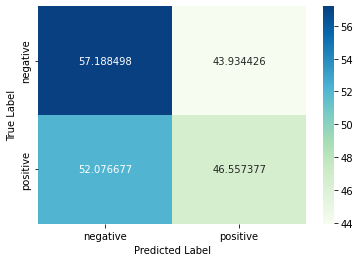

In [60]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

target_names = ['negative', 'positive']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt="f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

**3 Deep Learning**

In [64]:
import tensorflow as tf

In [65]:
def create_model():
    tf.random.set_seed(0)
    tf.compat.v1.reset_default_graph() # Clear Model

    model = tf.keras.models.Sequential([
      tf.keras.layers.Dense(100, activation='relu', input_shape=(11,)),
      tf.keras.layers.Dense(50, activation='relu'),
      tf.keras.layers.Dense(25, activation='relu'),
      tf.keras.layers.Dense(5, activation='relu'),
      tf.keras.layers.Dense(3, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')    
    ])
    return model

In [66]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [67]:
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

Train on 3162 samples, validate on 791 samples
3000/3162 [===========================>..] - ETA: 0s - loss: 0.6929 - accuracy: 0.5097

2021-09-13 17:06:18.641122: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1483] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via TF_XLA_FLAGS) or set the envvar XLA_FLAGS=--xla_hlo_profile.


3162/3162 [==============================] - 0s 150us/sample - loss: 0.6929 - accuracy: 0.5089 - val_loss: 0.6939 - val_accuracy: 0.4930
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 21us/sample - loss: 0.6918 - accuracy: 0.5307 - val_loss: 0.6934 - val_accuracy: 0.4981
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 20us/sample - loss: 0.6916 - accuracy: 0.5361 - val_loss: 0.6937 - val_accuracy: 0.5019
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 19us/sample - loss: 0.6909 - accuracy: 0.5402 - val_loss: 0.6929 - val_accuracy: 0.5032
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 18us/sample - loss: 0.6904 - accuracy: 0.5389 - val_loss: 0.6935 - val_accuracy: 0.5070
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 20us/sample - loss: 0.6905 - accurac

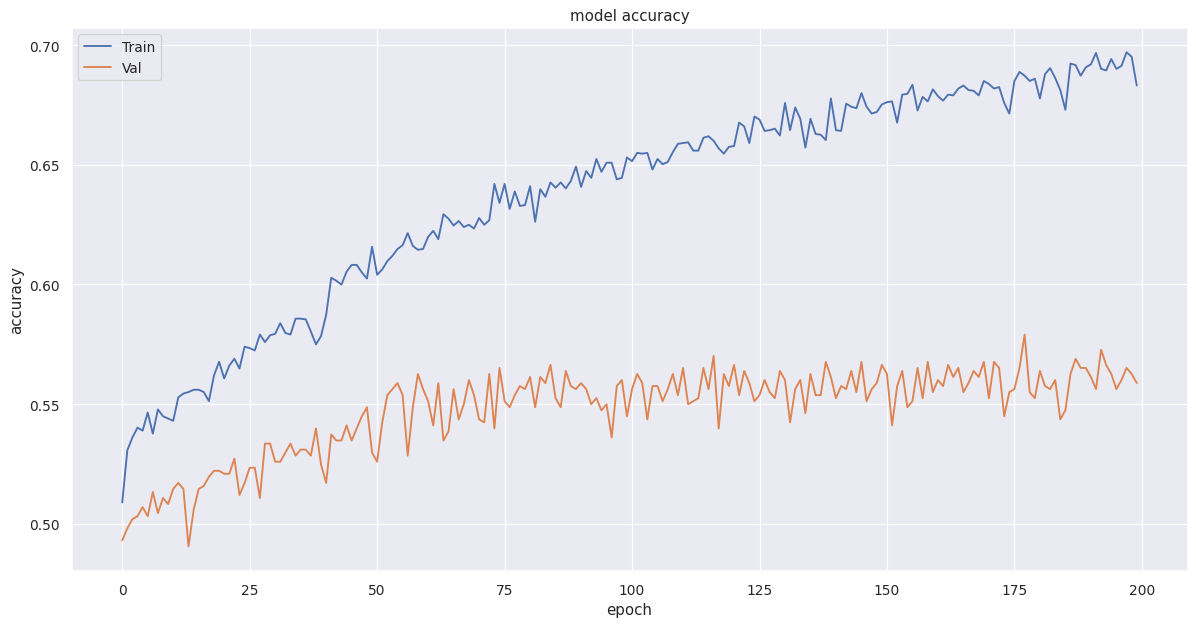

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [69]:
model = create_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [70]:
train_acc = list()
val_acc = list()
for i in range(0,100):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 142us/sample - loss: 0.6930 - accuracy: 0.5114 - val_loss: 0.6929 - val_accuracy: 0.5120
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 24us/sample - loss: 0.6927 - accuracy: 0.5225 - val_loss: 0.6933 - val_accuracy: 0.5032
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 24us/sample - loss: 0.6916 - accuracy: 0.5414 - val_loss: 0.6940 - val_accuracy: 0.5006
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 22us/sample - loss: 0.6912 - accuracy: 0.5348 - val_loss: 0.6942 - val_accuracy: 0.5019
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 22us/sample - loss: 0.6910 - accuracy: 0.5414 - val_loss: 0.6927 - val_accuracy: 0.5133
Train on 3162 samples, validate on 791 samples
3162/3162 [==========================

In [71]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = np.array([i[0] for i in y_predict.tolist()])
sum(y_predict == y_test)/len(y_test)

0.5711974110032363

# **Homework week 9**

In [72]:
tf.compat.v1.reset_default_graph()
np.random.seed(622110207)
tf.compat.v1.random.set_random_seed(622110207)
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(512, activation='relu', input_shape=(11,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               6144      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1300      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 21        
Total params: 179,945
Trainable params: 179,945
Non-trainable params: 0
__________________________________________________

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [74]:
train_acc = list()
val_acc = list()
for i in range(0,200):
  history = model.fit(X_train_norm, y_train, epochs= 1, batch_size = 200, validation_data= (X_val_norm, y_val))
  tmp_avg = np.mean(history.history['accuracy'])
  tmp_avg_val = np.mean(history.history['val_accuracy'])
  train_acc.append(tmp_avg)
  val_acc.append(tmp_avg_val)

Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 1s 159us/sample - loss: 0.6913 - accuracy: 0.5209 - val_loss: 0.6954 - val_accuracy: 0.5095
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 44us/sample - loss: 0.6889 - accuracy: 0.5433 - val_loss: 0.6933 - val_accuracy: 0.5171
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 41us/sample - loss: 0.6886 - accuracy: 0.5395 - val_loss: 0.6965 - val_accuracy: 0.5070
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 42us/sample - loss: 0.6864 - accuracy: 0.5490 - val_loss: 0.6937 - val_accuracy: 0.5221
Train on 3162 samples, validate on 791 samples
3162/3162 [==============================] - 0s 44us/sample - loss: 0.6865 - accuracy: 0.5433 - val_loss: 0.6949 - val_accuracy: 0.5133
Train on 3162 samples, validate on 791 samples
3162/3162 [==========================

In [75]:
history.history

{'loss': [0.24622064882596031],
 'accuracy': [0.8655914],
 'val_loss': [1.6464755200556045],
 'val_accuracy': [0.61946905]}

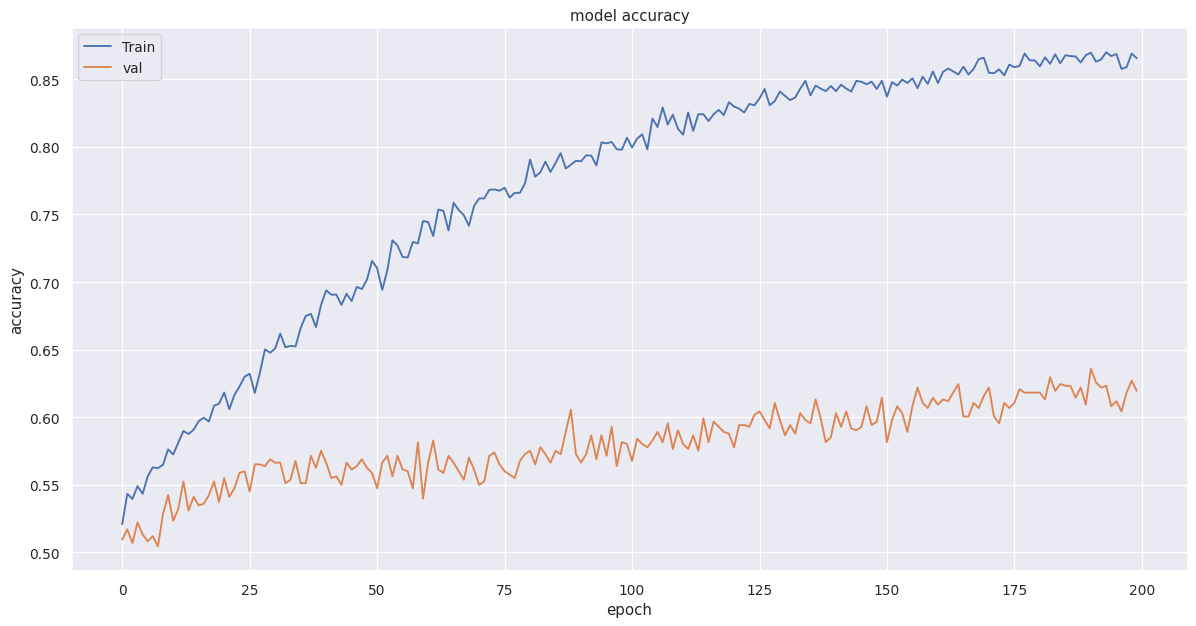

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(num=None, figsize=(16, 8), dpi=90, facecolor='w', edgecolor='k')
plt.plot()
plt.plot(train_acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'val'], loc='upper left')
plt.show()

In [77]:
y_predict = np.round(model.predict(X_test_norm))
y_predict = np.array([i[0] for i in y_predict.tolist()])
print("Test accuracy : "+str(sum(y_predict == y_test)/len(y_test)*100))

Test accuracy : 63.834951456310684


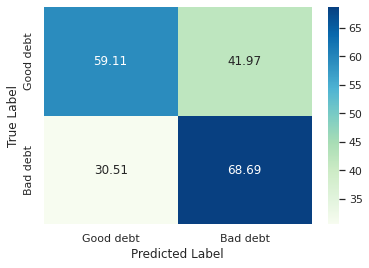

In [78]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['Good debt', 'Bad debt']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()